In [1]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
import matplotlib.pyplot as plt

In [2]:
mp_key = "kqoGOG3L85VvUgz1hujhLArYSrmj87fq"
mp_id = "mp-10182"

In [3]:
with MPRester(mp_key) as m:
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Structure de bande de phonons

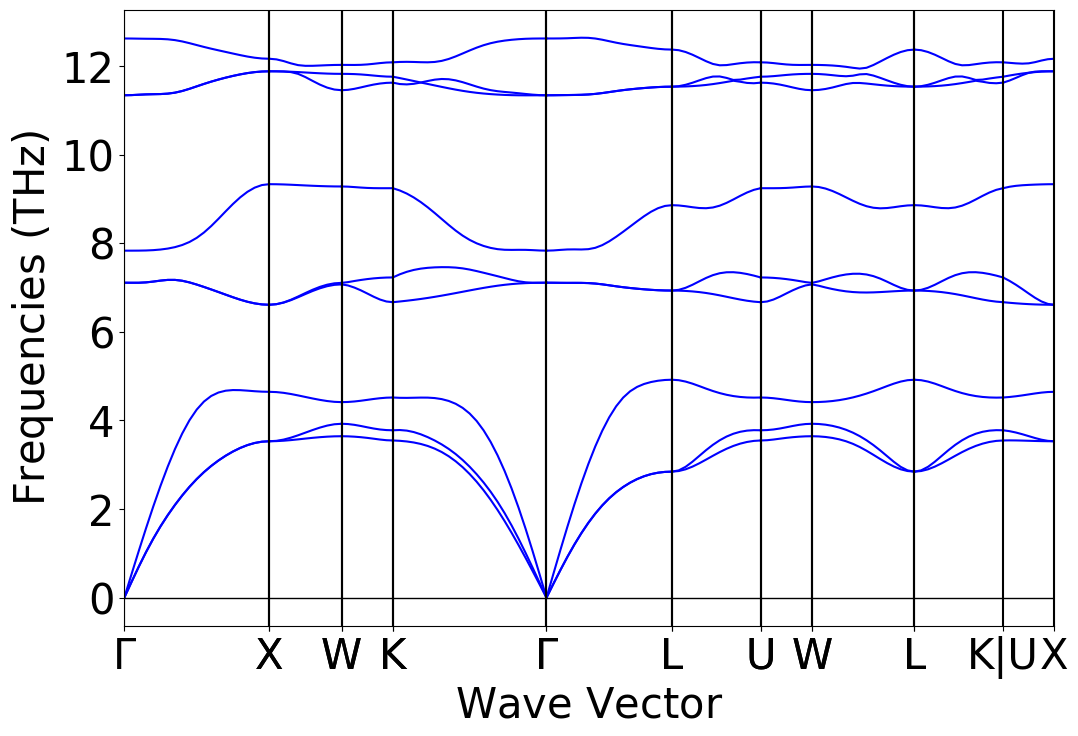

In [4]:
bsplotter = PhononBSPlotter(ph_bs)
bsplotter.show()

# Zone de Brillouin

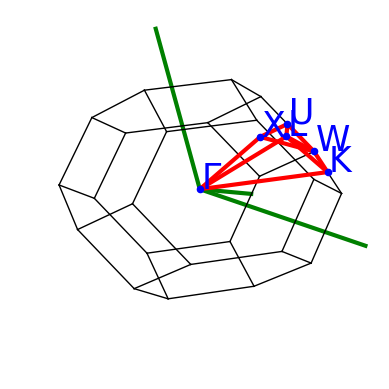

In [5]:
bsplotter.plot_brillouin()


Les branches acoustiques sont celles qui ont une fréquence nulle $(\omega=0)$ au centre de la zone de Brillouin (point $\Gamma$). On a donc des branches acoustiques dans les directions : $\Gamma - X, \Gamma - K$ et $\Gamma - L$

# Les trois branches acoustiques

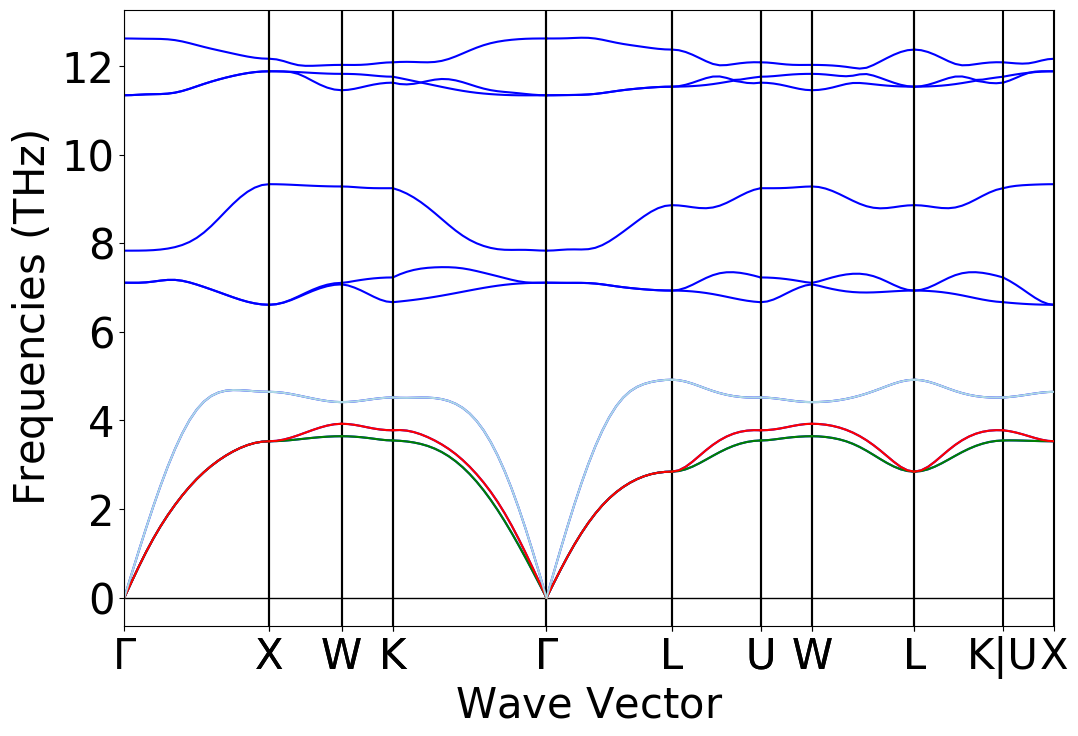

In [6]:
bsplotter.get_plot()
data = bsplotter.bs_plot_data() 
dist = data.get("distances")
freq = data.get("frequency")
for i in range(len(dist)):
    plt.plot(dist[i], freq[i][0], 'green')
    plt.plot(dist[i], freq[i][1], 'red')
    plt.plot(dist[i], freq[i][2], 'lightblue')

Quand $q \rightarrow 0$ et $\omega$ est proche de $0$, on a que la vitesse du son : $c = \frac{d\omega}{dq}$.

On va donc regarder la pente des branches acoustiques quand on est proche de $\omega = 0$

In [7]:
#angström
ang = 10**(-10)

# Direction $\Gamma - X$

In [8]:
x00 = dist[0][0]/ang
x01 = dist[0][1]/ang
y00 = 2*np.pi*freq[0][0][0]*10**(12)
y01 = 2*np.pi*freq[0][0][1]*10**(12)

vs0 = abs((y01-y00)/(x01-x00))
print("Vitesse du son pour la première branche (verte) :", vs0, "m/s.\n")


Vitesse du son pour la première branche (verte) : 4023.428903628074 m/s.



# Direction $\Gamma - K$

In [9]:
x10 = dist[3][-1]/ang
x11 = dist[3][-2]/ang
y10 = 2*np.pi*freq[3][1][-1]*10**(12)
y11 = 2*np.pi*freq[3][1][-2]*10**(12)

vs1 = abs((y11-y10)/(x11-x10))
print("Vitesse du son pour la deuxième branche (rouge) :", vs1, "m/s.\n")


Vitesse du son pour la deuxième branche (rouge) : 4035.1442606496325 m/s.



# Direction $\Gamma - L$

In [10]:
x20 = dist[4][0]/ang
x21 = dist[4][1]/ang
y20 = 2*np.pi*freq[4][2][0]*10**(12)
y21 = 2*np.pi*freq[4][2][1]*10**(12)

vs2 = abs((y21-y20)/(x21-x20))
print("Vitesse du son pour la troisième branche (bleu clair) :", vs2, "m/s.\n")

Vitesse du son pour la troisième branche (bleu clair) : 6394.026901745196 m/s.

